<a href="https://colab.research.google.com/github/Irenekayla/ML_Notebooks/blob/main/kk_AIPND_hymenoptera_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## AI Programming with Python Nanodegree: Hymenoptera Example
  - To use this notebook: `File > Save a copy in Drive`
  - Optional #1: Try out other architectures
  - Optional #2: Try to beat my performance (Accuracy, F1-Score) in 15 epochs or less.


### Code Explanation:

- **Necessary Imports:**
  - **Standard Library:**
    - `os`, `requests`, `copy`, `time`: Commonly used for file and directory operations, making HTTP requests, copying objects, and measuring time.
    - `functools`: Provides higher-order functions and operations on callable objects.
    - `ZipFile`: Allows working with zip archives.
    - `Path`: Represents a filesystem path.
    - `typing`: Supports type hints.

  - **Third-Party Libraries:**
    - `torch`, `torch.nn`, `torchvision`: Core libraries for deep learning in PyTorch.
    - `transforms`: Contains common image transformations.
    - `Image`: Provides image processing capabilities.
    - `matplotlib.pyplot`: Plotting library for creating visualizations.
    - `numpy`: Library for numerical operations.

  - **Library Installation (Optional):**
    - Attempts to import libraries such as `torchinfo`, `tqdm`, `torchmetrics`.
    - Installs the libraries if they are not already available.

- **Interpreting the Output:**
  - The code imports necessary libraries for deep learning, image processing, and visualization. Additionally, it checks for the availability of certain third-party libraries and installs them if needed. This ensures a smooth setup for executing the subsequent code related to neural network architecture, training, and evaluation.

- **Important Note:**
  - Ideally, you should use PyTorch v1.12+ and torchvision v0.14+ to avoid any issues in executing the code within this notebook and avoiding potential issues. However, I have listed in `Important Note` section wherever required the changes that you might have to make if you have earlier versions of PyTorch and torchvision.
  

In [1]:
# necessary import(s)

# standard library
import os
import requests
import copy
import time
import functools
from zipfile import ZipFile
from pathlib import Path
from typing import Tuple, Callable, Union, Any

# third party
import torch
import torch.nn as nn
import torchvision
import matplotlib.pyplot as plt
import numpy as np
from torchvision import transforms
from PIL import Image

# third party library installation if needed
try:
    from torchinfo import summary
    from tqdm.autonotebook import tqdm
    from torchmetrics.classification import MulticlassAccuracy, MulticlassF1Score
except:
    # installing torchinfo and then importing
    print("[INFO] Installing torchinfo for network architecture explanation.")
    !pip install torchinfo
    from torchinfo import summary

    # for readability
    print()

    # installing tqdm and then importing
    print("[INFO] Installing tqdm for progress bar.")
    !pip install tqdm
    from tqdm.autonotebook import tqdm

    # for readability
    print()

    # installing torchmetrics and importing MulticlassAccuracy and MulticlassF1Score
    print("[INFO] Installing torchmetrics for computing metrics for training/eval runs.")
    !pip install torchmetrics
    from torchmetrics.classification import MulticlassAccuracy, MulticlassF1Score

[INFO] Installing torchinfo for network architecture explanation.

[INFO] Installing tqdm for progress bar.


<ipython-input-1-6e06078c9daa>:39: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm



[INFO] Installing torchmetrics for computing metrics for training/eval runs.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 869.2/869.2 kB 21.6 MB/s eta 0:00:00


### Code Explanation:

- **Setting Up Hymenoptera Dataset:**
  - `DATASET_DIR = Path("./dataset")`: Sets up the main directory to store the dataset.
  - `HYMENOPTERA_DATASET = DATASET_DIR / Path("hymenoptera_data")`: Specifies the directory for the hymenoptera dataset.
  - `HYMENOPTERA_ZIP = Path("hymenoptera_data.zip")`: Defines the filename for the zip archive.
  - `HYMENOPTERA_FILE_PATH = DATASET_DIR / HYMENOPTERA_ZIP`: Specifies the path to the zip file.
  - `HYMENOPTERA_URL = "https://download.pytorch.org/tutorial/hymenoptera_data.zip"`: Provides the URL to download the dataset zip file.

- **Checking and Downloading Dataset:**
  - Checks if the 'hymenoptera_data' directory does not exist.
  - If not, creates the directory and parent directories if needed.
  - Downloads the zip file from the specified URL and saves it in the 'dataset' directory.
  - Extracts the contents of the zip file into the 'hymenoptera_data' directory.
  - Deletes the zip file post-extraction to save space.
  - Prints/log messages at each phase to provide information on the progress.

- **Interpreting the Output:**
  - The code sets up a directory structure for storing the Hymenoptera dataset. It then checks if the dataset is already present; if not, it downloads and extracts the dataset. The process includes handling errors and providing informative messages at each step.


In [2]:
# downloading hymenoptera dataset

# setting up directory for storing dataset
DATASET_DIR = Path("./dataset")

# the directory of hymenoptera dataset
HYMENOPTERA_DATASET = DATASET_DIR / Path("hymenoptera_data")

# setting up the path to .zip file
HYMENOPTERA_ZIP = Path("hymenoptera_data.zip")
HYMENOPTERA_FILE_PATH = DATASET_DIR / HYMENOPTERA_ZIP

# dataset url
HYMENOPTERA_URL = "https://download.pytorch.org/tutorial/hymenoptera_data.zip"

# checking if 'hymenoptera_data' directory does not exist
if not HYMENOPTERA_DATASET.is_dir():

    # creating directory and parent directories also if needed (not to throw error if DATASET_DIR already exists)
    DATASET_DIR.mkdir(parents=True, exist_ok=True)

    # printing/logging current phase: downloading file
    print("[INFO] Downloading 'hymenoptera_data.zip'...")

    # downloading file to 'dataset' directory if file does not exist
    try:
        request = requests.get(HYMENOPTERA_URL)
        # writing to disk
        with open(str(HYMENOPTERA_FILE_PATH), 'wb') as file_ref:
            print("[INFO] Downloaded 'hymenoptera_data.zip', writing to disk...")
            file_ref.write(request.content)
        # extracting zip file
        with ZipFile(str(HYMENOPTERA_FILE_PATH), 'r') as zip_ref:
            print("[INFO] Extracting 'hymenoptera_data.zip'...")
            zip_ref.extractall(DATASET_DIR)
            print("[INFO] Successfully extracted 'hymenoptera_data.zip'...")
        # removing zip file
        print("[INFO] Deleting 'hymenoptera_data.zip' post extraction...")
        os.remove(HYMENOPTERA_FILE_PATH)
        # printing/logging current phase: successful completion
        print("[INFO] Dataset setup successful.")

    # catching error (if any)
    except Exception as exc:
        print(f"[ERROR] File could not be downloaded/extracted: {exc}")

# if directory exists
else:
    print("[INFO] Dataset already setup, please continue.")

[INFO] Downloading 'hymenoptera_data.zip'...
[INFO] Downloaded 'hymenoptera_data.zip', writing to disk...
[INFO] Extracting 'hymenoptera_data.zip'...
[INFO] Successfully extracted 'hymenoptera_data.zip'...
[INFO] Deleting 'hymenoptera_data.zip' post extraction...
[INFO] Dataset setup successful.


### Code Explanation:

- **Maintaining Reproducibility:**
  - `def manual_seed(random_seed: int = 42) -> None:`: Defines a function to set random seeds for reproducibility.
    - `torch.manual_seed(random_seed)`: Sets the seed for generating random numbers on the CPU.
    - `if torch.cuda.is_available(): torch.cuda.manual_seed(random_seed)`: Sets the seed for generating random numbers on the GPU if available.

- **Device Agnostic Code:**
  - `device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')`: Determines the device (GPU or CPU) to be used for computation.
  
- **Clearing GPU Cache (if using GPU):**
  - `if str(device) == "cuda": torch.cuda.empty_cache()`: Clears the GPU cache if the computation is performed on the GPU.

- **Interpreting the Output:**
  - The code provides a function `manual_seed` to set random seeds for both CPU and GPU for reproducibility. It then determines the device to be used for computation (GPU if available, otherwise CPU). Finally, it clears the GPU cache to free up memory if the GPU is used. This setup is essential for obtaining reproducible results in deep learning experiments.


In [3]:
# creating function for maintaining reproducibility

def manual_seed(random_seed: int = 42) -> None:
    '''
    For maintaining reproducibility of a notebook cell.
    '''
    # for non-cuda
    torch.manual_seed(random_seed)
    # in case cuda exists
    if torch.cuda.is_available():
        torch.cuda.manual_seed(random_seed)

# creating device agnostic code
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# clearing cache if using GPU
if str(device) == "cuda":
    torch.cuda.empty_cache()

### Code Explanation:

- **Setting Hyperparameters:**
  - `BATCH_SIZE = 32`: Specifies the number of training examples utilized in one iteration.
  - `LEARNING_RATE = 2e-4`: Defines the step size during optimization, indicating how much the model parameters are updated.
  - `EPOCHS = 15`: Determines the number of times the entire training dataset is passed forward and backward through the neural network.
  - `HIDDEN_LAYER_1 = 256`: Specifies the number of neurons (units) in the first hidden layer of the neural network.
  - `HIDDEN_LAYER_2 = 128`: Specifies the number of neurons (units) in the second hidden layer of the neural network.

- **Interpreting the Output:**
  - These hyperparameters are crucial in configuring the training process of a neural network:
    - `BATCH_SIZE`: Affects how quickly the model learns and the memory usage.
    - `LEARNING_RATE`: Influences the size of the steps taken during optimization.
    - `EPOCHS`: Defines the number of times the model sees the entire training dataset.
    - `HIDDEN_LAYER_1` and `HIDDEN_LAYER_2`: Determine the size of the hidden layers in the neural network, impacting its capacity to learn complex patterns.


In [4]:
# selecting hyperparameters

BATCH_SIZE = 32
LEARNING_RATE = 2e-4
EPOCHS = 15
HIDDEN_LAYER_1 = 256
HIDDEN_LAYER_2 = 128

### Code Explanation:

- **Multi-Weight Support API Overview:**
  - `resnet_34_weights = torchvision.models.ResNet34_Weights.DEFAULT`: Specifies the weights to be used for the ResNet-34 model. The `.DEFAULT` attribute provides the best possible weights.
  
- **Understanding Transforms for Training:**
  - `resnet_34_default_transforms = resnet_34_weights.transforms()`: Retrieves the transforms applied during the training of the ResNet-34 model with the specified weights.

- **Checking Transforms:**
  - `print(resnet_34_default_transforms)`: Displays the transforms used for training, providing insights into data preprocessing.

- **Creating ResNet-34 Model:**
  - `model = torchvision.models.resnet34(weights=resnet_34_weights)`: Initializes a ResNet-34 model using the specified weights. This simplifies the process of using pre-trained weights for the model.

- **Interpreting the Output:**
  - The code showcases the ease of using pre-trained weights with the Multi-Weight Support API in torchvision. It also highlights the transparency of the applied transforms during training, allowing users to understand the data preprocessing steps.

- **Important Note:**
  - Only use multi-weight support API when you have both torch (PyTorch) v1.12+ and torchvision 0.14+
  - If the version conditions are not met then continue using the older API i.e. `model = torchvision.models.resnet34(pretrained=True)`
  - In older version however you cannot access the transforms directly and you'll have to look at the documentation for the transforms/pre-processing steps that were used.


In [5]:
# an overview of how the multi-weight support API works: need torch v1.12+ and torchvision 0.14+

resnet_34_weights = torchvision.models.ResNet34_Weights.DEFAULT     # DEFAULT will give you the best possible weights

# we can look at the transforms used for training the given weights for this network architecture
resnet_34_default_transforms = resnet_34_weights.transforms()

# checking transforms
print(resnet_34_default_transforms)

# creating ResNet-34 architecture using the weights specified above
model = torchvision.models.resnet34(weights = resnet_34_weights)

ImageClassification(
    crop_size=[224]
    resize_size=[256]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)


Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 179MB/s]


### Code Explanation:

- **Network Inspection with `torchinfo`:**
  - `summary(model, input_size=(1, 3, 224, 224), col_names=("input_size", "output_size", "num_params", "kernel_size", "mult_adds", "trainable"), col_width=20, row_settings=("var_names",))`: Utilizes the `torchinfo` library to provide a detailed summary of the ResNet-34 model.
    - `input_size=(1, 3, 224, 224)`: Specifies the input size for the model.
    - `col_names`: Defines the columns to be displayed in the summary.
    - `col_width=20`: Sets the column width for better readability.
    - `row_settings=("var_names",)`: Specifies the row settings to include variable names in the summary.

- **Interpreting the Output:**
  - The code uses `torchinfo` to inspect and summarize the ResNet-34 model, displaying information such as input and output sizes, the number of parameters, kernel sizes, and computational complexity (multiply-adds). This helps users understand the architecture and characteristics of the model at a glance.


In [6]:
# using torchinfo to inspect the network

summary(model,
        input_size=(1,3,224,224),
        col_names=("input_size",
                   "output_size",
                   "num_params",
                   "kernel_size",
                   "mult_adds",
                   "trainable"),
        col_width=20,
        row_settings=("var_names",))

Layer (type (var_name))                  Input Shape          Output Shape         Param #              Kernel Shape         Mult-Adds            Trainable
ResNet (ResNet)                          [1, 3, 224, 224]     [1, 1000]            --                   --                   --                   True
├─Conv2d (conv1)                         [1, 3, 224, 224]     [1, 64, 112, 112]    9,408                [7, 7]               118,013,952          True
├─BatchNorm2d (bn1)                      [1, 64, 112, 112]    [1, 64, 112, 112]    128                  --                   128                  True
├─ReLU (relu)                            [1, 64, 112, 112]    [1, 64, 112, 112]    --                   --                   --                   --
├─MaxPool2d (maxpool)                    [1, 64, 112, 112]    [1, 64, 56, 56]      --                   3                    --                   --
├─Sequential (layer1)                    [1, 64, 56, 56]      [1, 64, 56, 56]      --        

### Code Explanation:

- **Transforming Data for Training and Validation/Test:**
  - `train_transforms = transforms.Compose([...])`: Creates a composition of image transformations for training data. This includes:
    - `transforms.Resize(size=(256, 256), interpolation=transforms.InterpolationMode.BILINEAR)`: Resizes images to 256x256 pixels using bilinear interpolation.
    - `transforms.TrivialAugmentWide(interpolation=transforms.InterpolationMode.BILINEAR)`: Applies wide data augmentation (if available) to enhance model generalization. If not available, consider alternative data augmentation techniques.
    - `transforms.CenterCrop(size=(224, 224))`: Performs center cropping to obtain a final size of 224x224 pixels.
    - `transforms.ToTensor()`: Converts the image to a PyTorch tensor.
    - `transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])`: Normalizes the tensor by subtracting mean values and dividing by standard deviation values.

- **Important Note:**
  - The training transform includes data augmentation techniques to improve the model's ability to generalize to different variations in the input data.
  - If `transforms.TrivialAugmentWide` is not available for your torchvision version then feel free to replace it with a combination of other transforms such as: `torchvision.transforms.RandomRotation` and `torchvision.transforms.RandomHorizontalFlip`. However, make sure you do not rotate randomly for more than ~15 degrees as that might be a bit too much for some applications.

In [7]:
# we can either use these transforms or compose transforms manually (doing train_transforms manually because we need data augmentation)

# 1. training transform: if TrivialAugmentWide is not available for your torchvision version use other data augmentation techniques (https://pytorch.org/vision/stable/transforms.html#v1-api-reference)
train_transforms = transforms.Compose([transforms.Resize(size=(256,256),
                                                         interpolation=transforms.InterpolationMode.BILINEAR),
                                       transforms.TrivialAugmentWide(interpolation = transforms.InterpolationMode.BILINEAR),
                                       transforms.CenterCrop(size=(224,224)),
                                       transforms.ToTensor(),
                                       transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                            std=[0.229, 0.224, 0.225])])

# 2. using resnet_34_default_transforms for val/test sets

### Code Explanation:

- **Creating ImageFolder Datasets:**
  - `train_dataset = torchvision.datasets.ImageFolder(root=str(HYMENOPTERA_DATASET / Path('train')), transform=train_transforms)`: Creates an ImageFolder dataset for training with the specified root directory and transforms using the training transformations defined earlier.
  - `val_dataset = torchvision.datasets.ImageFolder(root=str(HYMENOPTERA_DATASET / Path('val')), transform=resnet_34_default_transforms)`: Creates an ImageFolder dataset for validation with the specified root directory and default transformations obtained from the ResNet-34 weights.

- **Extracting Additional Information:**
  - `CLASSES = train_dataset.classes`: Extracts the list of classes from the training dataset.
  - `NUM_CLASSES = len(CLASSES)`: Determines the total number of classes in the dataset.
  - `CLASS_TO_IDX = train_dataset.class_to_idx`: Retrieves the mapping of class names to corresponding indices.

- **Note:**
  - The `ImageFolder` dataset assumes a specific directory structure where subdirectories represent classes, and images are stored in those class directories. This structure simplifies dataset creation and handling.
  - Using Default Transforms for Validation/Test: `resnet_34_default_transforms = resnet_34_weights.transforms()` -> Utilizes the default transforms obtained from the ResNet-34 weights for validation and test sets.


In [8]:
# creating torchvision.ImageFolder datasets

# 1. training dataset
train_dataset = torchvision.datasets.ImageFolder(root = str(HYMENOPTERA_DATASET / Path('train')),
                                        transform=train_transforms)

# 2. validation dataset
val_dataset = torchvision.datasets.ImageFolder(root = str(HYMENOPTERA_DATASET / Path('val')),
                                      transform=resnet_34_default_transforms)

# extracting number of classes and class_to_idx mapping
CLASSES = train_dataset.classes
NUM_CLASSES = len(CLASSES)
CLASS_TO_IDX = train_dataset.class_to_idx

### Code Explanation:

- **Creating Data Loaders:**
  - `train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=os.cpu_count() if str(device) == "cuda" else 0, pin_memory=True if str(device) == "cuda" else False)`: Creates a DataLoader for the training dataset with the specified batch size, shuffling the data, and employing parallel data loading for efficiency. `pin_memory` is set to `True` when using GPU to optimize data transfer.
  - `val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=os.cpu_count() if str(device) == "cuda" else 0, pin_memory=True if str(device) == "cuda" else False)`: Creates a DataLoader for the validation dataset with similar configurations.

- **Parameters:**
  - `batch_size`: Specifies the number of samples per batch.
  - `shuffle`: Determines whether to shuffle the dataset in each epoch (set to `True` for training).
  - `num_workers`: Specifies the number of worker processes for parallel data loading. It spawns worker processes equal to the number of CPU cores if using GPU or is set to 0 if using the CPU.
  - `pin_memory`: If using GPU, setting this to `True` enables faster data transfer.


In [9]:
# creating dataloaders

# 1. training set dataloader
train_loader = torch.utils.data.DataLoader(train_dataset,
                                           batch_size = BATCH_SIZE,
                                           shuffle=True,
                                           num_workers=os.cpu_count() if str(device) == "cuda" else 0,      # if you have GPU it makes sense to spin up multiple worker processes to fetch data batches, num_workers=<cpu cores> is a good rule of thumb (https://stackoverflow.com/a/54002191)
                                           pin_memory=True if str(device) == "cuda" else False)             # if you have GPU it almost always makes sense to have 'pin_memory = True', as this makes the data transfer to GPU more efficient (https://discuss.pytorch.org/t/when-to-set-pin-memory-to-true/19723/2)

# 2. validation set dataloader
val_loader = torch.utils.data.DataLoader(val_dataset,
                                         batch_size = BATCH_SIZE,
                                         shuffle=False,
                                         num_workers=os.cpu_count() if str(device) == "cuda" else 0,
                                         pin_memory=True if str(device) == "cuda" else False)

### Code Explanation:

- **Denormalize and Clip Function:**
  - `def denormalize_and_clip(img, mean, std)`: Takes an image tensor, denormalizes it using the specified mean and standard deviation, and clips the values to stay within the valid range [0, 1].

- **Image Show Function:**
  - `def imshow(img, title)`: Displays the image using Matplotlib, setting the title and removing ticks and axes.

- **Visualize Random Batch Function:**
  - `def visualize_random_batch(data_loader, loader_type, mean, std)`: Selects a random batch from the given data loader, denormalizes the images, and displays them in a grid. It also shows the corresponding class names.
    - `num_images_to_show`: Limits the number of images displayed to a maximum of 5.
    - Example usage with training and validation loaders is provided at the end.

- **Example Usage:**
  - Initializes mean and standard deviation values.
  - Calls `visualize_random_batch` for both the training and validation loaders, displaying a random batch of images.


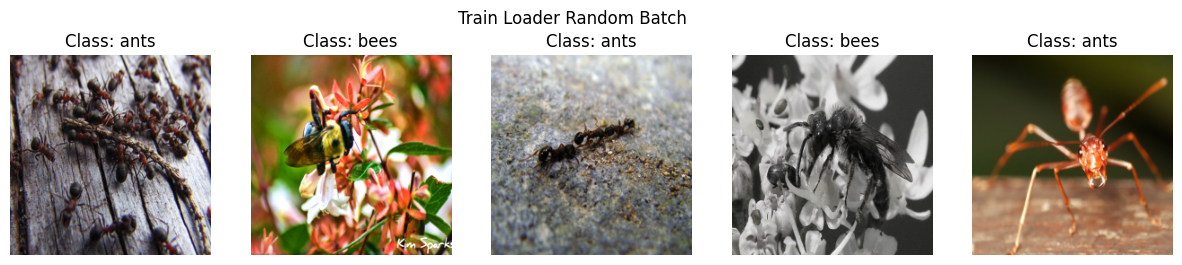

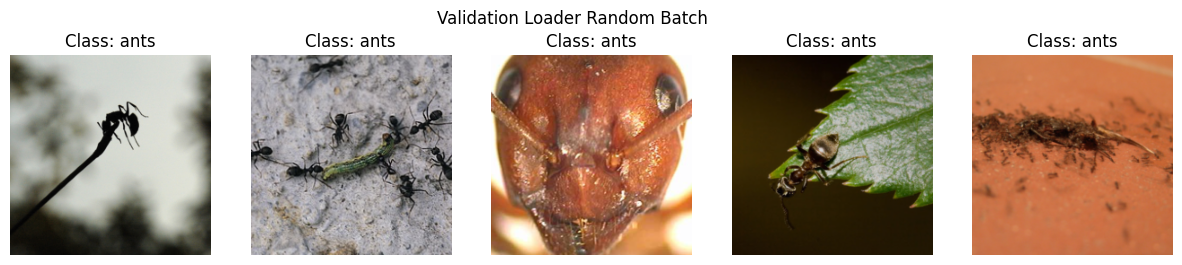

In [10]:
def denormalize_and_clip(img, mean, std):
    img = img.numpy(force=True) if isinstance(img, torch.Tensor) else img
    img = np.transpose(img, (1, 2, 0))

    # Denormalize and clip values to stay in the valid range [0, 1]
    img = std * img + mean
    img = np.clip(img, 0, 1)
    return img

def imshow(img, title):
    plt.imshow(img)
    plt.title(title)
    plt.axis('off')  # Remove ticks and axes
    plt.show()

def visualize_random_batch(data_loader, loader_type, mean, std):
    # Get a random batch index
    batch_index = np.random.randint(len(data_loader))

    # Get the random batch from the data loader
    for i, (images, labels) in enumerate(data_loader):
        if i == batch_index:
            break

    # Define the classes (assuming your dataset has a 'classes' attribute)
    classes = data_loader.dataset.classes

    # Display images from the random batch in a grid
    num_images_to_show = min(5, len(images))  # Display at most 5 images
    fig, axes = plt.subplots(1, num_images_to_show, figsize=(15, 3))

    for i in range(num_images_to_show):
        image = images[i]
        label = labels[i].item()
        class_name = classes[label]

        # Show the image
        image = denormalize_and_clip(image, mean, std)  # Apply denormalization
        axes[i].imshow(image)
        axes[i].set_title(f'Class: {class_name}')
        axes[i].axis('off')  # Remove ticks and axes

    plt.suptitle(f'{loader_type} Random Batch')
    plt.show()

# Example usage with your dataloaders
mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])

visualize_random_batch(train_loader, 'Train Loader', mean, std)  # Visualization of a random batch from the training set
visualize_random_batch(val_loader, 'Validation Loader', mean, std)  # Visualization of a random batch from the validation set


### Code Explanation:

- **Swapping Out ResNet Classifier Head:**
  - `manual_seed()`: Calls the function to set a manual seed for reproducibility.
  - Freezing the complete network by setting `requires_grad` to False for all parameters using a loop.
  - Swapping out the existing classifier head (`model.fc`) with a new one:
    - Using `nn.Sequential` to define a sequence of layers.
    - Adding three fully connected layers with ReLU activation and dropout between them.
    - The output layer has the number of neurons equal to the number of classes in the training dataset.

- **Note:**
  - This step is common when you want to replace the default classifier head of a pre-trained model with a custom one to adapt it to your specific task.


In [11]:
# swapping out the resnet classifier head

# using the function 'manual_seed()' created above to lock reproducibility of this cell
manual_seed()

# freezing out the complete network first
for param in model.parameters():
    param.requires_grad = False

# now swapping out the MLP classifier head
model.fc = nn.Sequential(nn.Linear(512, HIDDEN_LAYER_1),
                         nn.ReLU(),
                         nn.Dropout(p=0.2),
                         nn.Linear(HIDDEN_LAYER_1, HIDDEN_LAYER_2),
                         nn.ReLU(),
                         nn.Dropout(p=0.2),
                         nn.Linear(HIDDEN_LAYER_2, len(train_dataset.classes)))

### Code Explanation:

- **Checking Model Details after Modifications:**
  - `summary()`: Uses the `torchinfo` library to display detailed information about the modified model.
    - `input_size=(1, 3, 224, 224)`: Specifies the input size for the summary.
    - `col_names`: Defines the column names for the summary table.
    - `col_width=20`: Sets the width of the columns.
    - `row_settings=("var_names",)`: Specifies the settings for the rows in the summary.

- **Note:**
  - This step is crucial to inspect the modified model architecture, especially after freezing the convolutional backbone and replacing the classifier head. It provides insights into the number of parameters, layer sizes, and other relevant details.


In [12]:
# checking details after freezing the convolution backbone and swapping out the classifier head

summary(model,
        input_size=(1,3,224,224),
        col_names=("input_size",
                   "output_size",
                   "num_params",
                   "kernel_size",
                   "mult_adds",
                   "trainable"),
        col_width=20,
        row_settings=("var_names",))

Layer (type (var_name))                  Input Shape          Output Shape         Param #              Kernel Shape         Mult-Adds            Trainable
ResNet (ResNet)                          [1, 3, 224, 224]     [1, 2]               --                   --                   --                   Partial
├─Conv2d (conv1)                         [1, 3, 224, 224]     [1, 64, 112, 112]    (9,408)              [7, 7]               118,013,952          False
├─BatchNorm2d (bn1)                      [1, 64, 112, 112]    [1, 64, 112, 112]    (128)                --                   128                  False
├─ReLU (relu)                            [1, 64, 112, 112]    [1, 64, 112, 112]    --                   --                   --                   --
├─MaxPool2d (maxpool)                    [1, 64, 112, 112]    [1, 64, 56, 56]      --                   3                    --                   --
├─Sequential (layer1)                    [1, 64, 56, 56]      [1, 64, 56, 56]      --   

### Code Explanation:

- **Training Step Function:**
  - `training_step`: Represents a single step of training for a given epoch.
    - Takes the model, training dataloader, optimizer, criterion, accuracy metric, F1-score metric, current epoch number, and device as input.
    - Executes a forward pass, calculates loss, performs backpropagation, and takes an optimization step for each batch in the training dataloader.
    - Displays progress using tqdm progress bar and prints batch-level statistics.
    - Computes and returns the average loss, training accuracy, and training F1-score for the epoch.

- **Important Note:**
  - This function is a key component in the training process, providing a clear structure for each training epoch and reporting relevant metrics for monitoring the model's performance
  - Use `with torch.no_grad():` instead of `with torch.inference_mode():` if you get errors for that specific line.

In [13]:
# creating a single step of training

def training_step(model: nn.Module,
                  train_dataloader: torch.utils.data.DataLoader,
                  optimizer: torch.optim.Optimizer,
                  criterion: nn.Module,
                  training_accuracy: MulticlassAccuracy,
                  training_f1: MulticlassF1Score,
                  epoch_num: int,
                  device: torch.device = device) -> Tuple[torch.Tensor, torch.Tensor, torch.Tensor]:
    '''
    Function for a single step of training.

    Args:
        model: The model/network to train
        train_dataloader: The dataloader for training set
        optimizer: The optimization algorithm to use
        criterion: The error function for setting up the optimization problem
        training_accuracy: Instance of MulticlassAccuracy class from torchmetrics
        training_f1: Instance of MulticlassF1Score class from torchmetrics
        epoch_num: The current epoch number
        device: The device being used for model/network training [Default: device]

    Returns:
        Tuple of training loss, training accuracy and training f1 score
    '''

    # setting the model to train mode
    model.train()

    # placeholder for calculating loss epoch wise
    epoch_loss = 0

    # using tqdm for progress bar
    with tqdm(enumerate(train_dataloader, start=1), total=len(train_dataloader), unit=" train-batch") as tepoch:
        # iterating over the data batches
        for batch_idx, (features, labels) in tepoch:
            # setting description (prefix) for tqdm progress bar
            tepoch.set_description(f"Epoch: {epoch_num+1} | Phase - Training")

            # moving the batches to device
            features, labels = features.to(device), labels.to(device).type(torch.long)      # typecasting labels (if using CE Loss)

            # doing forward propagation
            logits = model(features)
            # calculating loss
            loss = criterion(logits, labels)
            # zeroing out accumulated gradients from the previous iteration
            optimizer.zero_grad()
            # doing backpropagation: computing partial derivatives
            loss.backward()
            # taking an optimization step using the gradients computed above
            optimizer.step()

            # calculating average loss and Accuracy/F1-Score per batch (removing this part from computation graph)
            with torch.inference_mode():        # use torch.no_grad() if torch.inference_mode() is not available in PyTorch version
                avg_loss_sample = loss/len(labels)
                batch_acc = training_accuracy.forward(logits, labels)
                batch_f1 = training_f1.forward(logits, labels)

            # accumulating in epoch loss
            epoch_loss += avg_loss_sample

            # setting postfix for progress bar
            tepoch.set_postfix(batch_f1_score=batch_f1.item(), batch_accuracy=f"{batch_acc.item()*100:.2f}%", loss_per_sample=avg_loss_sample.item())

    # averaging loss over batches
    epoch_loss /= len(train_dataloader)

    # for readability
    print()

    # printing epoch statistics
    print(f"[INFO] Epoch: {epoch_num+1} | loss: {epoch_loss.item():.3f} | training acc: {training_accuracy.compute().item()*100:.2f}% | training f1-score: {training_f1.compute().item():.2f}")

    # returning loss, acc and f1
    return epoch_loss, training_accuracy.compute(), training_f1.compute()


### Code Explanation:

- **Testing Step Function:**
  - `testing_step`: Represents a single step of testing/validation.
    - Takes the model, test dataloader, criterion, accuracy metric, F1-score metric, current epoch number, and device as input.
    - Sets the model to evaluation mode.
    - Executes a forward pass, calculates loss, and computes accuracy and F1-score for each batch in the test dataloader.
    - Displays progress using tqdm progress bar and prints batch-level statistics.
    - Computes and returns the average loss, test accuracy, and test F1-score for the epoch.

- **Important Note:**
  - This function is crucial for evaluating the model's performance on the test set, providing insights into how well the model generalizes to unseen data.
  - Use `with torch.no_grad():` instead of `with torch.inference_mode():` if you get errors for that specific line.
  

In [14]:
# creating a single step of testing

def testing_step(model: nn.Module,
                 test_dataloader: torch.utils.data.DataLoader,
                 criterion: nn.Module,
                 test_accuracy: MulticlassAccuracy,
                 test_f1: MulticlassF1Score,
                 epoch_num: int = -1,
                 device: torch.device = device) -> Tuple[torch.Tensor, torch.Tensor, torch.Tensor]:
    '''
    Function for a single step of testing.

    Args:
        model: The model/network to train
        test_dataloader: The dataloader for test set
        criterion: The error function for quantifying how wrong predictions are
        test_accuracy: Instance of MulticlassAccuracy class from torchmetrics
        test_f1: Instance of MulticlassF1Score class from torchmetrics
        epoch_num: The current epoch number [Default: -1]
        device: The device being used for model/network testing [Default: device]

    Returns:
        Tuple of test loss, test accuracy and test f1 score
    '''

    # setting the model to eval mode
    model.eval()

    # placeholder for calculating loss epoch wise
    epoch_loss = 0

    # using tqdm for progress bar
    with tqdm(enumerate(test_dataloader, start=1), total=len(test_dataloader), unit=" test-batch") as tepoch:
        # iterating over the data batches
        for batch_idx, (features, labels) in tepoch:
            # setting description (prefix) for tqdm progress bar
            tepoch.set_description(f"Epoch: {epoch_num+1} | Phase - Validation/Test")

            # moving the batches to device
            features, labels = features.to(device), labels.to(device).type(torch.long)      # typecasting labels (if using CE Loss)

            # doing forward poss + loss computation, calculating average loss and Accuracy/F1-Score per batch (removing this part from computation graph)
            with torch.inference_mode():        # use torch.no_grad() if torch.inference_mode() is not available in PyTorch version
                # doing forward propagation
                logits = model(features)
                # calculating loss
                loss = criterion(logits, labels)
                # calculating per sample loss in a batch
                avg_loss_sample = loss/len(labels)
                # calculating accuracy for the batch
                batch_acc = test_accuracy.forward(logits, labels)
                # calculating f1-score for the batch
                batch_f1 = test_f1.forward(logits, labels)

            # accumulating in epoch loss
            epoch_loss += avg_loss_sample

            # setting postfix for progress bar
            tepoch.set_postfix(batch_f1_score=batch_f1.item(), batch_accuracy=f"{batch_acc.item()*100:.2f}%", loss_per_sample=avg_loss_sample.item())

    # averaging loss over batches
    epoch_loss /= len(test_dataloader)

    # for readability
    print()

    # printing epoch statistics
    print(f"[INFO] Epoch: {epoch_num+1} | loss: {epoch_loss.item():.3f} | val/test acc: {test_accuracy.compute().item()*100:.2f}% | val/test f1-score: {test_f1.compute().item():.2f}")

    # for readability
    print()

    # returning loss, acc and f1
    return epoch_loss, test_accuracy.compute(), test_f1.compute()


### Code Explanation:

- **Decorating Function for Timing:**
  - `timing_function`: A decorator function to determine the execution time of another function.
    - Takes a function `func` as input.
    - Uses `functools.wraps` to preserve the original function's signature.
    - Defines a `wrapper` function that computes the time taken for the execution of `func`.
    - Prints the time statistics in minutes and seconds.
    - Returns the output received from the `func` function.

- **Note:**
  - This decorator can be applied to functions to measure their execution time. It's useful for profiling and understanding the performance of different components in the code.


In [15]:
# decorating function for training function below

def timing_function(func: Callable[..., Any]) -> Callable[..., Any]:
    '''
    Decorating function for determining the time taken for execution of a function.

    Args:
        func: Function whose execution time has to be determined

    Returns:
        wrapper function around the function whose execution time we have to determine
    '''

    # using wraps to preserve function signature
    @functools.wraps(func)
    def wrapper(*args, **kwargs) -> Any:
        '''
        The wrapper function wrapping the function that was input to timing_function.

        Args:
            *args: Variable length positional argument(s)
            *kwargs: Variable length keyword argument(s)

        Returns:
            Any output received from the 'func' function
        '''

        # computing time taken for execution of function (training pipeline etc.)
        start_time = time.perf_counter()
        func_out = func(*args, **kwargs)
        end_time = time.perf_counter()

        # for readability
        print()
        print()

        # printing time statistics
        print(f"[INFO] Time taken -> {(end_time-start_time)//60}m and {(end_time-start_time)%60:.2f}s")

        # return statement for wrapper
        return func_out
    # returning wrapper
    return wrapper

### Code Explanation:

- **Training Pipeline:**
  - `training`: Function defining the training pipeline.
    - Combines the training and testing steps.
    - Takes a model, training and testing dataloaders, optimizer, criterion, accuracy and F1 score metrics for training and testing, the number of epochs, and the device as input.
    - Moves the model and metrics to the specified device.
    - Iterates over epochs, performing training and validation steps.
    - Keeps track of best performing model based on validation loss.
    - Returns the best model's state dictionary and a dictionary of training statistics.

- **Note:**
  - This function provides a complete training pipeline, including training and testing steps for a specified number of epochs. It's decorated with `timing_function` to measure execution time.


In [16]:
# training pipeline: combining the two functions training_step and testing_step

@timing_function
def training(model: nn.Module,
             train_dataloader: torch.utils.data.DataLoader,
             test_dataloader: torch.utils.data.DataLoader,
             optimizer: torch.optim.Optimizer,
             criterion: nn.Module,
             training_accuracy: MulticlassAccuracy,
             training_f1: MulticlassF1Score,
             test_accuracy: MulticlassAccuracy,
             test_f1: MulticlassF1Score,
             epochs: int = 5,
             device: torch.device = device) -> Tuple[dict, dict]:
             '''
             Function defining the training pipeline.

             Args:
                 model: The model/network to train
                 train_dataloader: The dataloader for training set
                 test_dataloader: The dataloader for test set
                 optimizer: The optimization algorithm to use
                 criterion: The error function for setting up the optimization problem
                 training_accuracy: Instance of MulticlassAccuracy class from torchmetrics (for training)
                 training_f1: Instance of MulticlassF1Score class from torchmetrics (for training)
                 test_accuracy: Instance of MulticlassAccuracy class from torchmetrics (for test)
                 test_f1: Instance of MulticlassF1Score class from torchmetrics (for test)
                 epochs: The number of epochs to train the model for [Default: 5]
                 device: The device being used for model/network training + eval [Default: device]

             Returns:
                 None
             '''

             # moving model to device
             model.to(device)

             # moving torchmetrics metric objects to device
             training_accuracy.to(device)
             training_f1.to(device)
             test_accuracy.to(device)
             test_f1.to(device)

             # lists for tracking loss and metrics
             train_loss = []
             train_acc = []
             train_f1 = []
             val_loss = []
             val_acc = []
             val_f1 = []

             # will be used for keeping track of best performing model
             best_loss = float("inf")

             # training model for given number of epochs
             for epoch_iter in range(epochs):
                # single step of training
                train_epoch_loss, train_epoch_acc, train_epoch_f1 = training_step(model,
                                                                                  train_dataloader,
                                                                                  optimizer,
                                                                                  criterion,
                                                                                  training_accuracy,
                                                                                  training_f1,
                                                                                  epoch_iter,
                                                                                  device)
                # appending to respective lists (train)
                train_loss.append(train_epoch_loss)
                train_acc.append(train_epoch_acc)
                train_f1.append(train_epoch_f1)

                # for readability
                print()

                # single step of validation
                val_epoch_loss, val_epoch_acc, val_epoch_f1 = testing_step(model,
                                                                           test_dataloader,
                                                                           criterion,
                                                                           test_accuracy,
                                                                           test_f1,
                                                                           epoch_iter,
                                                                           device)
                # appending to respective lists (test)
                val_loss.append(val_epoch_loss)
                val_acc.append(val_epoch_acc)
                val_f1.append(val_epoch_f1)

                # for readability
                print()

                # checking if loss has improved
                if best_loss > val_epoch_loss:
                    best_model = copy.deepcopy(model.state_dict())       # taking a deepcopy of model.state_dict()
                    best_loss = val_epoch_loss
                    best_epoch = epoch_iter

             # using list comprehension for loss, acc and f1 lists
             train_loss = [tensor.item() for tensor in train_loss]
             train_acc = [tensor.item() for tensor in train_acc]
             train_f1 = [tensor.item() for tensor in train_f1]
             val_loss = [tensor.item() for tensor in val_loss]
             val_acc = [tensor.item() for tensor in val_acc]
             val_f1 = [tensor.item() for tensor in val_f1]

             # creating training statistics dictionary
             training_statistics = {"training_loss": train_loss,
                                    "training_accuracy": train_acc,
                                    "training_f1": train_f1,
                                    "validation_loss": val_loss,
                                    "validation_accuracy": val_acc,
                                    "validation_f1": val_f1,
                                    "best_epoch": best_epoch+1,
                                    "loss_on_best_epoch": best_loss.item(),
                                    "device_used": device}

             # for readability
             print()
             print()

             # printing training statistics
             print(f"Best epoch: {training_statistics['best_epoch']} | Training acc on best epoch: {training_statistics['training_accuracy'][training_statistics['best_epoch']-1]*100:.2f}% | Validation acc on best epoch: {training_statistics['validation_accuracy'][training_statistics['best_epoch']-1]*100:.2f}%")

             # returning best performing model and statistics dictionary
             return best_model, training_statistics


### Code Explanation:

- **Model Saving and Loading:**
  - `save_model`: Function for saving the state_dict of a model.
  - `save_checkpoint`: Function for saving a general checkpoint including optimizer, criterion, epoch, device, hidden layers, output layer, classes, and class-to-index mapping.
  - `load_model`: Function for loading a model by inserting a loaded state_dict into a newly defined architecture.
  - `load_checkpoint`: Function for loading a general checkpoint dictionary.

- **Note:**
  - These functions provide mechanisms to save and load models, including their state_dicts and additional information for resuming training or inference.


In [17]:
# for saving and loading model

# saving model
def save_model(model: nn.Module,
               model_name: str) -> str:
    '''
    Function for saving state_dict of model.

    Args:
        model: model (nn.Module) whose state_dict you have to save
        model_name: The name to use for saving the state_dict

    Returns:
        The path to saved state_dict (str)
    '''

    # model save location
    SAVE_PATH = f"./{model_name}.pt"

    # saving model and printing message
    torch.save(model.state_dict(), SAVE_PATH)
    print(f"[INFO] {model_name} saved to {SAVE_PATH}")

    # returning path of saved model
    return SAVE_PATH

# saving general checkpoint
def save_checkpoint(optimizer: torch.optim.Optimizer,
                    criterion: nn.Module,
                    epoch: int,
                    device_trained_on: torch.device,
                    hidden_layers: tuple,
                    output_layer: int,
                    classes: list,
                    class_to_idx: dict,
                    checkpoint_name: str = "checkpoint") -> str:
    '''
    Function for saving the general checkpoint including anything important other than state_dict() of model.

    Args:
        optimizer: optimizer whose state_dict has to be saved
        criterion: loss/criterion used for training the network
        epoch: The epoch number of best performing model
        device_trained_on: The device on which the model was trained on
        hidden_layers: The specifications of the two hidden layers
        classes: The list of classes for the given classification problem
        class_to_idx: The class to index mapping/dictionary
        dheckpoint_name: The name by which to save the general checkpoint

    Returns:
        The path to saved general checkpoint (str)
    '''

    # checkpoint save location
    SAVE_PATH = f"./{checkpoint_name}.pth"

    # saving the checkpoint
    torch.save({"optimizer": optimizer.state_dict(),
                "criterion": criterion,
                "epoch": epoch,
                "device_trained_on": device_trained_on,
                "hidden_layers": hidden_layers,
                "output_layer": output_layer,
                "classes": classes,
                "class_to_idx": class_to_idx}, SAVE_PATH)

    # printing save confirmation
    print(f"[INFO] The general checkpoint has been saved to: {SAVE_PATH}")

    # returning the saved checkpoint path
    return SAVE_PATH

# loading model
def load_model(model_save_path: str,
               hidden_layers: tuple,
               output_layer: int,
               device_trained_on: torch.device,
               device: torch.device) -> nn.Module:
    '''
    Function for loading state_dict() of the saved model and inserting that into a newly defined architecture (must be same as original model arch).

    Args:
        model_save_path: Save path to the state_dict() of model
        hidden_layers: The specifications of the two hidden layers
        output_layer: The specification of the output layer
        device_trained_on: The device on which the model was trained on originally
        device: The device on which the newly defined model should be moved to

    Returns:
        The model with loaded state_dict()
    '''

    # building resnet
    model = torchvision.models.resnet34(weights = None)

    # swapping classifier head using hidden layers
    model.fc = nn.Sequential(nn.Linear(512, hidden_layers[0]),
                             nn.ReLU(),
                             nn.Dropout(p=0.2),
                             nn.Linear(hidden_layers[0], hidden_layers[1]),
                             nn.ReLU(),
                             nn.Dropout(p=0.2),
                             nn.Linear(hidden_layers[1], output_layer))

    # loading model state_dict
    if str(device_trained_on) in ("cuda", "cuda:0"):
        # saved on GPU, loading on CPU case
        if str(device) == "cpu":
            model.load_state_dict(torch.load(model_save_path, map_location=device))
        # saved on GPU, loading on GPU case
        elif str(device) in ("cuda", "cuda:0"):
            model.load_state_dict(torch.load(model_save_path))
    else:
        # saved on CPU, loading on CPU case
        if str(device) == "cpu":
            model.load_state_dict(torch.load(model_save_path))
        # saved on CPU, loading on GPU case
        elif str(device) in ("cuda", "cuda:0"):
            model.load_state_dict(torch.load(model_save_path, map_location="cuda:0"))

    # moving model to device and switching to eval mode
    model.to(device);
    model.eval();

    # returning model
    return model

# loading model
def load_checkpoint(checkpoint_save_path: str) -> dict:
    '''
    Function for loading checkpoint dictionary from given path of the saved checkpoint.

    Args:
        checkpoint_save_path: Path to the general checkpoint .pth file

    Returns:
        The checkpoint dictionary (dict)
    '''

    # returning checkpoint dictionary
    CHECKPOINT_DICT = torch.load(checkpoint_save_path)
    return CHECKPOINT_DICT


### Code Explanation:

- **Criterion and Optimizer:**
  - `criterion`: CrossEntropyLoss is commonly used for classification problems where each input sample can only belong to one class. It combines softmax activation and negative log-likelihood loss.
  - `optimizer`: Adam optimizer is chosen for updating the weights of the model's classifier head during training.

- **Metrics:**
  - `training_acc`, `training_f1`, `val_acc`, and `val_f1`: These are instances of torchmetrics' `MulticlassAccuracy` and `MulticlassF1Score` classes. They are used for tracking training and validation accuracy as well as F1-score during the training pipeline.


### Code Explanation:

- **Criterion and Optimizer:**
  - `criterion`: CrossEntropyLoss is used for the classification problem, as explained before.
  - `optimizer`: AdamW optimizer is chosen for updating the weights of the model's classifier head during training. AdamW is a variant of Adam that includes weight decay (L2 regularization), which helps prevent overfitting.

- **Metrics:**
  - `training_acc`, `training_f1`, `val_acc`, and `val_f1`: Instances of torchmetrics' `MulticlassAccuracy` and `MulticlassF1Score` classes, used for tracking training and validation accuracy as well as F1-score during the training pipeline.

- **Important Note:**
  - Use `torch.optim.Adam(model.fc.parameters(), lr=LEARNING_RATE)` if you get errors with `torch.optim.AdamW(model.fc.parameters(), lr=LEARNING_RATE)`.

In [18]:
# creating criterion, optimizer and metrics

# criterion and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(model.fc.parameters(),        # change this to torch.optim.Adam
                             lr = LEARNING_RATE)

# creating metrics to be used in training pipeline (for training and validation phase)
training_acc = MulticlassAccuracy(num_classes = NUM_CLASSES)
training_f1 = MulticlassF1Score(num_classes = NUM_CLASSES)
val_acc = MulticlassAccuracy(num_classes = NUM_CLASSES)
val_f1 = MulticlassF1Score(num_classes = NUM_CLASSES)

### Code Explanation:

- **Setting Manual Seed:**
  - `manual_seed()`: This function is used to set a manual seed for reproducibility. It ensures that the random initialization of parameters and other random processes in PyTorch will produce the same results each time the code is run.

- **Starting Training:**
  - `training`: This function initiates the training pipeline for the specified number of epochs (`EPOCHS`). It uses the previously defined model, data loaders, optimizer, criterion, and metrics for training and validation. The returned values are the state dictionary of the model after the best epoch and a dictionary containing training statistics.
  - `model`: The neural network model.
  - `train_dataloader`: DataLoader for the training set.
  - `test_dataloader`: DataLoader for the validation set.
  - `optimizer`: The optimizer for updating model parameters.
  - `criterion`: The loss function used for training.
  - `training_accuracy`, `training_f1`: Metrics for training set evaluation.
  - `test_accuracy`, `test_f1`: Metrics for validation set evaluation.
  - `epochs`: Number of training epochs.

- **Returned Values:**
  - `resnet_state_dict`: The state dictionary of the model after the best epoch.
  - `training_stats`: A dictionary containing training statistics such as training and validation loss, accuracy, and F1-score over epochs.


In [19]:
# using manual_seed for reproducbility
manual_seed()

# starting training
resnet_state_dict, training_stats = training(model,
                                             train_dataloader = train_loader,
                                             test_dataloader = val_loader,
                                             optimizer = optimizer,
                                             criterion = criterion,
                                             training_accuracy = training_acc,
                                             training_f1 = training_f1,
                                             test_accuracy = val_acc,
                                             test_f1 = val_f1,
                                             epochs=EPOCHS)

  0%|          | 0/8 [00:00<?, ? train-batch/s]


[INFO] Epoch: 1 | loss: 0.022 | training acc: 61.48% | training f1-score: 0.61



  0%|          | 0/5 [00:00<?, ? test-batch/s]


[INFO] Epoch: 1 | loss: 0.019 | val/test acc: 88.26% | val/test f1-score: 0.88




  0%|          | 0/8 [00:00<?, ? train-batch/s]


[INFO] Epoch: 2 | loss: 0.020 | training acc: 69.67% | training f1-score: 0.70



  0%|          | 0/5 [00:00<?, ? test-batch/s]


[INFO] Epoch: 2 | loss: 0.016 | val/test acc: 90.18% | val/test f1-score: 0.90




  0%|          | 0/8 [00:00<?, ? train-batch/s]


[INFO] Epoch: 3 | loss: 0.016 | training acc: 75.56% | training f1-score: 0.76



  0%|          | 0/5 [00:00<?, ? test-batch/s]


[INFO] Epoch: 3 | loss: 0.013 | val/test acc: 91.26% | val/test f1-score: 0.91




  0%|          | 0/8 [00:00<?, ? train-batch/s]


[INFO] Epoch: 4 | loss: 0.015 | training acc: 78.18% | training f1-score: 0.78



  0%|          | 0/5 [00:00<?, ? test-batch/s]


[INFO] Epoch: 4 | loss: 0.011 | val/test acc: 91.65% | val/test f1-score: 0.92




  0%|          | 0/8 [00:00<?, ? train-batch/s]


[INFO] Epoch: 5 | loss: 0.012 | training acc: 80.42% | training f1-score: 0.80



  0%|          | 0/5 [00:00<?, ? test-batch/s]


[INFO] Epoch: 5 | loss: 0.008 | val/test acc: 92.24% | val/test f1-score: 0.92




  0%|          | 0/8 [00:00<?, ? train-batch/s]


[INFO] Epoch: 6 | loss: 0.011 | training acc: 81.69% | training f1-score: 0.82



  0%|          | 0/5 [00:00<?, ? test-batch/s]


[INFO] Epoch: 6 | loss: 0.007 | val/test acc: 92.58% | val/test f1-score: 0.93




  0%|          | 0/8 [00:00<?, ? train-batch/s]


[INFO] Epoch: 7 | loss: 0.009 | training acc: 83.03% | training f1-score: 0.83



  0%|          | 0/5 [00:00<?, ? test-batch/s]


[INFO] Epoch: 7 | loss: 0.006 | val/test acc: 92.78% | val/test f1-score: 0.93




  0%|          | 0/8 [00:00<?, ? train-batch/s]


[INFO] Epoch: 8 | loss: 0.008 | training acc: 84.22% | training f1-score: 0.84



  0%|          | 0/5 [00:00<?, ? test-batch/s]


[INFO] Epoch: 8 | loss: 0.006 | val/test acc: 93.13% | val/test f1-score: 0.93




  0%|          | 0/8 [00:00<?, ? train-batch/s]


[INFO] Epoch: 9 | loss: 0.008 | training acc: 84.84% | training f1-score: 0.85



  0%|          | 0/5 [00:00<?, ? test-batch/s]


[INFO] Epoch: 9 | loss: 0.005 | val/test acc: 93.30% | val/test f1-score: 0.93




  0%|          | 0/8 [00:00<?, ? train-batch/s]


[INFO] Epoch: 10 | loss: 0.006 | training acc: 85.66% | training f1-score: 0.86



  0%|          | 0/5 [00:00<?, ? test-batch/s]


[INFO] Epoch: 10 | loss: 0.005 | val/test acc: 93.58% | val/test f1-score: 0.94




  0%|          | 0/8 [00:00<?, ? train-batch/s]


[INFO] Epoch: 11 | loss: 0.006 | training acc: 86.33% | training f1-score: 0.86



  0%|          | 0/5 [00:00<?, ? test-batch/s]


[INFO] Epoch: 11 | loss: 0.004 | val/test acc: 93.82% | val/test f1-score: 0.94




  0%|          | 0/8 [00:00<?, ? train-batch/s]


[INFO] Epoch: 12 | loss: 0.005 | training acc: 87.06% | training f1-score: 0.87



  0%|          | 0/5 [00:00<?, ? test-batch/s]


[INFO] Epoch: 12 | loss: 0.004 | val/test acc: 93.95% | val/test f1-score: 0.94




  0%|          | 0/8 [00:00<?, ? train-batch/s]


[INFO] Epoch: 13 | loss: 0.005 | training acc: 87.74% | training f1-score: 0.88



  0%|          | 0/5 [00:00<?, ? test-batch/s]


[INFO] Epoch: 13 | loss: 0.004 | val/test acc: 94.07% | val/test f1-score: 0.94




  0%|          | 0/8 [00:00<?, ? train-batch/s]


[INFO] Epoch: 14 | loss: 0.005 | training acc: 88.21% | training f1-score: 0.88



  0%|          | 0/5 [00:00<?, ? test-batch/s]


[INFO] Epoch: 14 | loss: 0.004 | val/test acc: 94.05% | val/test f1-score: 0.94




  0%|          | 0/8 [00:00<?, ? train-batch/s]


[INFO] Epoch: 15 | loss: 0.005 | training acc: 88.64% | training f1-score: 0.89



  0%|          | 0/5 [00:00<?, ? test-batch/s]


[INFO] Epoch: 15 | loss: 0.005 | val/test acc: 94.07% | val/test f1-score: 0.94




Best epoch: 14 | Training acc on best epoch: 88.21% | Validation acc on best epoch: 94.05%


[INFO] Time taken -> 0.0m and 52.03s


### Code Explanation:

- **Plotting Curves:**
  - `plot_curves(stats)`: This function takes a dictionary (`stats`) containing training statistics and plots three curves: Loss, Accuracy, and F1-score. It extracts relevant data from the dictionary, such as training and validation loss, accuracy, and F1-score. The curves are plotted over the epochs.
  - The three subplots represent:
    1. **Loss Curves:** Training loss and validation loss over epochs. The point of the best epoch is highlighted.
    2. **Accuracy Curves:** Training accuracy and validation accuracy over epochs.
    3. **F1-score Curves:** Training F1-score and validation F1-score over epochs.
  - The function uses `matplotlib` to create the plots and display them.

- **Displayed Curves:**
  - `plot_curves(training_stats)`: This line calls the `plot_curves` function with the training statistics (`training_stats`) obtained from the training pipeline. It displays the loss, accuracy, and F1-score curves for both training and validation sets.


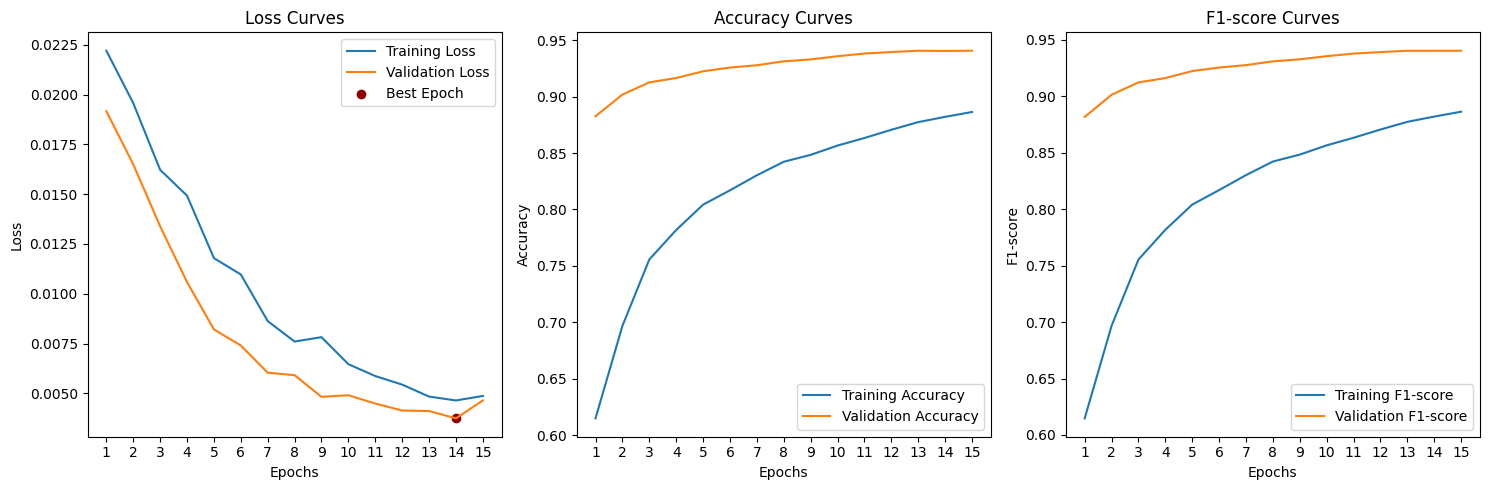

In [20]:
# function to plot curves

def plot_curves(stats):
    # Extract data from the dictionary
    training_loss = stats['training_loss']
    training_accuracy = stats['training_accuracy']
    training_f1 = stats['training_f1']

    validation_loss = stats['validation_loss']
    validation_accuracy = stats['validation_accuracy']
    validation_f1 = stats['validation_f1']

    best_epoch = stats['best_epoch']
    loss_on_best_epoch = stats['loss_on_best_epoch']

    epochs = range(1, len(training_loss) + 1)

    # Plotting loss curve
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.plot(epochs, training_loss, label='Training Loss')
    plt.plot(epochs, validation_loss, label='Validation Loss')
    plt.scatter(best_epoch, loss_on_best_epoch, color='darkred', marker='o', label='Best Epoch')
    plt.title('Loss Curves')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.xticks(epochs)  # Ensure x-axis ticks are integers
    plt.legend()

    # Plotting accuracy curve
    plt.subplot(1, 3, 2)
    plt.plot(epochs, training_accuracy, label='Training Accuracy')
    plt.plot(epochs, validation_accuracy, label='Validation Accuracy')
    plt.title('Accuracy Curves')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.xticks(epochs)  # Ensure x-axis ticks are integers
    plt.legend()

    # Plotting F1-score curve
    plt.subplot(1, 3, 3)
    plt.plot(epochs, training_f1, label='Training F1-score')
    plt.plot(epochs, validation_f1, label='Validation F1-score')
    plt.title('F1-score Curves')
    plt.xlabel('Epochs')
    plt.ylabel('F1-score')
    plt.xticks(epochs)  # Ensure x-axis ticks are integers
    plt.legend()

    plt.tight_layout()
    plt.show()

# displaying curves
plot_curves(training_stats)

### Code Explanation:

- **Saving Model and Checkpoint:**
  - `MODEL_SAVE_PATH = save_model(model, "resnet_34")`: This line saves the state_dict of the trained model (`model`) and returns the path where the model is saved. The name of the model file is specified as "resnet_34".
  - `CHKPT_SAVE_PATH = save_checkpoint(...)`: This line saves a general checkpoint, including optimizer state, criterion, epoch, device information, hidden layers, output layer specifications, class information, and class-to-index mapping. It returns the path where the checkpoint is saved.

- **Loading Model and Checkpoint:**
  - `CHKPT_DICT = load_checkpoint(CHKPT_SAVE_PATH)`: This line loads the general checkpoint dictionary from the saved checkpoint file. The path to the saved checkpoint is provided as an argument.
  - `new_model = load_model(...)`: This line loads a new instance of the model architecture, swaps out the classifier head using the specifications from the checkpoint dictionary, loads the state_dict from the saved model file, and moves the model to the CPU. The returned `new_model` is ready for evaluation on new data.

- **Note:**
  - The loaded model (`new_model`) can be used for inference on new data using the defined architecture and the learned parameters.


In [21]:
# saving model and checkpoint
MODEL_SAVE_PATH = save_model(model, "resnet_34")
CHKPT_SAVE_PATH = save_checkpoint(optimizer,
                                  criterion,
                                  epoch = training_stats["best_epoch"]-1,
                                  device_trained_on = device,
                                  hidden_layers = (HIDDEN_LAYER_1, HIDDEN_LAYER_2),
                                  output_layer = NUM_CLASSES,
                                  classes = CLASSES,
                                  class_to_idx = CLASS_TO_IDX,
                                  checkpoint_name = "checkpoint")

# loading model and checkpoint
CHKPT_DICT = load_checkpoint(CHKPT_SAVE_PATH)
new_model = load_model(MODEL_SAVE_PATH,
                       hidden_layers = CHKPT_DICT["hidden_layers"],
                       output_layer = CHKPT_DICT["output_layer"],
                       device_trained_on = CHKPT_DICT["device_trained_on"],
                       device = torch.device("cpu"))

[INFO] resnet_34 saved to ./resnet_34.pt
[INFO] The general checkpoint has been saved to: ./checkpoint.pth


<ipython-input-17-a15b946800b3>:141: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  CHECKPOINT_DICT = torch.load(checkpoint_save_path)
<ipython-input-17-a15b946800b3>:109: Fu

### Code Explanation:

- **Predicting and Plotting Top-k Classes:**
  - `@timing_function`: This is a decorator that measures the execution time of the decorated function.
  - `predict_and_plot_topk(...)`: This function takes a PyTorch model (`model`), an image transformation pipeline (`img_transform`), a list of class names (`class_list`), the path to an image file (`image_path`), the computing device (`device`), and an optional parameter `topk` for specifying the number of top classes to display. It performs the following steps:
    1. **Load and Preprocess Image:** Open the image file, convert it to RGB format, and apply the image transformation.
    2. **Make Predictions:** Pass the preprocessed image through the model to obtain predictions.
    3. **Convert to Probabilities:** Apply softmax to convert the model output to probabilities.
    4. **Top-k Classes:** Identify the top-k predicted classes and their corresponding probabilities.
    5. **Plotting:** Create a horizontal bar graph with two subplots - one for displaying the input image and the other for showing the top-k predicted classes with their probabilities.

- **Example Usage:**
  - `predict_and_plot_topk(...)` is called with an example usage, where `new_model` is the loaded model, `resnet_34_default_transforms` is the image transformation pipeline, `CLASSES` is the list of class names, `"<PATH/TO/IMG.JPG>"` is the path to the image file, `device` is the computing device, and `topk=2` specifies to display the top 2 predicted classes.
  - The function outputs a bar graph showing the top predicted classes along with their probabilities.

- **Note:**
  - Ensure that the paths and variables are adapted to match your specific project structure.


--2024-10-04 06:57:40--  https://i.ytimg.com/vi/tXjHb5QmDV0/maxresdefault.jpg
Resolving i.ytimg.com (i.ytimg.com)... 142.250.101.119, 142.251.2.119, 2607:f8b0:4023:c03::77, ...
Connecting to i.ytimg.com (i.ytimg.com)|142.250.101.119|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 88716 (87K) [image/jpeg]
Saving to: ‘/content/image.jpg’

/content/image.jpg  100%[===================>]  86.64K  --.-KB/s    in 0.001s  

2024-10-04 06:57:40 (124 MB/s) - ‘/content/image.jpg’ saved [88716/88716]



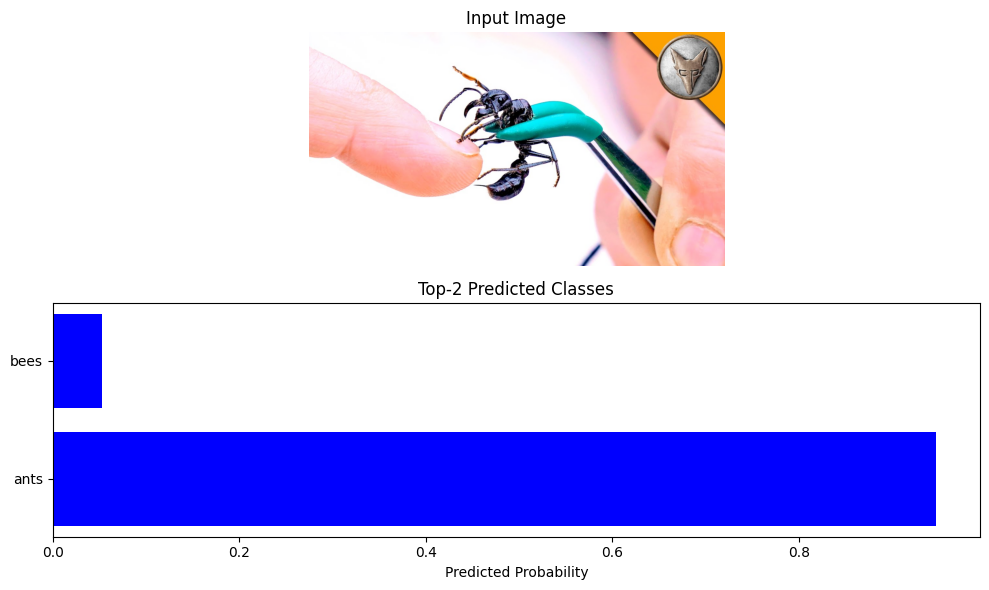



[INFO] Time taken -> 0.0m and 0.50s


In [22]:
# function to predict on a give image sample and draw a bargraph

@timing_function
def predict_and_plot_topk(model: nn.Module,
                          img_transform: transforms.Compose,
                          class_list: list,
                          image_path: str,
                          device: torch.device,
                          topk: int = 5):

    # Load and preprocess the image
    image = Image.open(image_path).convert("RGB")
    input_tensor = img_transform(image)
    input_batch = input_tensor.unsqueeze(0).to(device)

    # Moving model to device and switching to eval mode
    model.to(device)
    model.eval()

    # Make predictions
    with torch.inference_mode():
        output = model(input_batch)

    # Convert the output to probabilities using softmax
    probabilities = torch.nn.functional.softmax(output[0], dim=0)

    # Get the top-k class indices and probabilities
    topk_probs, topk_indices = torch.topk(probabilities, topk)
    topk_probs_np = topk_probs.numpy(force=True)
    topk_indices_np = topk_indices.numpy(force=True)

    # Convert tensor to numpy array for plotting
    probs_np = probabilities.numpy(force=True)

    # Create a horizontal bar graph
    plt.figure(figsize=(10, 6))

    # Plot the image
    plt.subplot(2, 1, 1)
    plt.imshow(image)
    plt.title('Input Image')
    plt.axis('off')

    # Plot the top-k classes
    plt.subplot(2, 1, 2)
    plt.barh([class_list[i] for i in topk_indices_np], topk_probs_np, color='blue')
    plt.xlabel('Predicted Probability')
    plt.title(f'Top-{topk} Predicted Classes')

    plt.tight_layout()
    plt.show()

# downloading a sample image
!wget https://i.ytimg.com/vi/tXjHb5QmDV0/maxresdefault.jpg -O /content/image.jpg      # provide link to any .jpg image here

# Example usage
# Assuming you have a PyTorch model 'new_model', a list of class names extracted using dataset_name.classes, and an image file path
predict_and_plot_topk(new_model,
                      resnet_34_default_transforms,
                      CLASSES,
                      "/content/image.jpg",
                      device,
                      topk=2)

## This project was made with love while listening to a lot of beautiful music:
  - Runnin' Down A Dream by Tom Petty: https://www.youtube.com/watch?v=Y1D3a5eDJIs
  - 3 Hours of Soothing Batman Vibes: https://youtu.be/BlLk6BSyOjQ?si=QtTL4SYfKP09YQy0
  - Nuclear by Mike Oldfield: https://www.youtube.com/watch?v=IkAp5gAYDUQ